Import thư viện

In [ ]:
import numpy as np 
from numpy import log,dot,exp,shape
import pandas as pd
import matplotlib.pyplot as plt # Các bạn có thể thử plot chart bằng plotly
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  

# 1: Implement hàm sigmoid

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 2: Implement lại Logistic Regression

In [ ]:
def standardize(X_tr):
    # Normalize lại các giá trị để có thể tính toán một cách "mượt" hơn 
    # Sau này, khi xây dựng model, các bạn nên normalize lại dữ liệu trước khi train
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])


def f1_score(y,y_hat):
    tp, tn, fp, fn = 0,0,0,0
    # tp: True Positive -> label = True, Prediction = True | Dự đoán đúng
    # tn: True Negative ->label = True, Prediction = False | Dự đoán sai
    # fp: False Positive -> label = False and Prediction = True | Dự đoán sai
    # fn: False Negative -> label = False and Prediction = False | Dự đoán đúng

    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1

    precision = tp / (tp + fp)
    recall = tp / (tp + fn) # Đôi khi còn được biết đến với độ nhạy (sensitivity, thường thấy nhiều trong các vấn đề liên quan đến thống kê trong bài toán phân loại 2 lớp)
    f1_score = 2 * precision * recall / (precision + recall)
    return f1_score

In [ ]:
class LogisticRegression:
    def __init__(self, X, y, lr = 0.001, iter=100, threshold=0.5):
        self.w, self.X = self._initialize(X)
        self.y = y
        self.lr = lr
        self.iter = iter
        self.threshold = threshold

    def _initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X

    def fit(self):
        def l(theta):
            z = dot(self.X,theta)
            cost0 = self.y.T.dot(log(sigmoid(z)))
            cost1 = (1-self.y).T.dot(log(1-sigmoid(z)))
            cost = -((cost1 + cost0))/len(self.y)
            return cost

        self.loss = np.zeros(self.iter,)
        for i in range(self.iter):
            self.w = self.w - self.lr*dot(self.X.T,sigmoid(dot(self.X,self.w))-np.reshape(self.y,(len(self.y),1)))
            self.loss[i] = l(self.w)

        return self.loss

    @property
    def loss_hist(self):
        plt.scatter([i for i in range(self.iter)], self.loss, c='red', s=10, label='loss')
        plt.legend(loc=1)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')


    def predict(self,X):
        z = dot(self._initialize(X)[1],self.w)
        lis = []
        for i in sigmoid(z):
            if i >= self.threshold: # Đôi khi, dữ liệu của chúng ta có vấn đề, chúng ta có thể điều chỉnh mức để đưa ra dự đoán phù hợp hơn với đặc tính của dữ liệu
                lis.append(1)
            else:
                lis.append(0)
        return lis



# 3a: Tạo dữ liệu

In [ ]:
X, y = make_classification(n_features=2, n_classes=2, n_redundant=0, n_samples = 200, random_state=42)

#3b: Visualize dữ liệu

Text(0, 0.5, 'X $2^{nd}$ dimension')

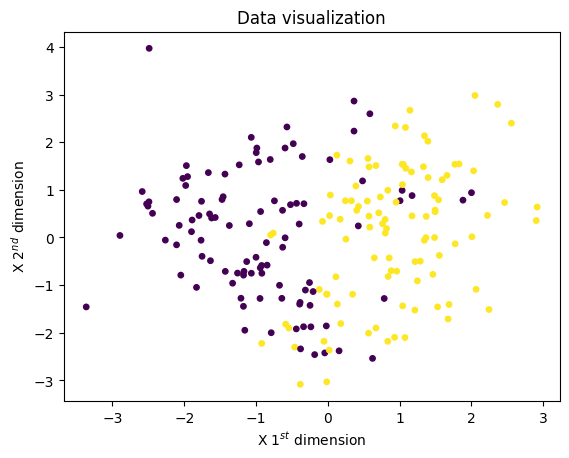

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=15, cmap='viridis')
plt.title("Data visualization")
plt.xlabel('X $1^{st}$ dimension')
plt.ylabel('X $2^{nd}$ dimension')

# 3c: Chia dữ liệu thành train và test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 4: Fit dữ liệu với Logistic Regression

In [ ]:
standardize(X_train)
standardize(X_test)
cls = LogisticRegression(X_train, y_train, iter=400)
model= cls.fit()
y_test_pred = cls.predict(X_test)
y_train_pred = cls.predict(X_train)

# 4b: Tính f1-score

In [ ]:
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
print("f1 score train: ",f1_score_train)
print("f1 score test: ", f1_score_test)

f1 score train:  0.8685714285714287
f1 score test:  0.7317073170731707


# 4c: Visualize loss

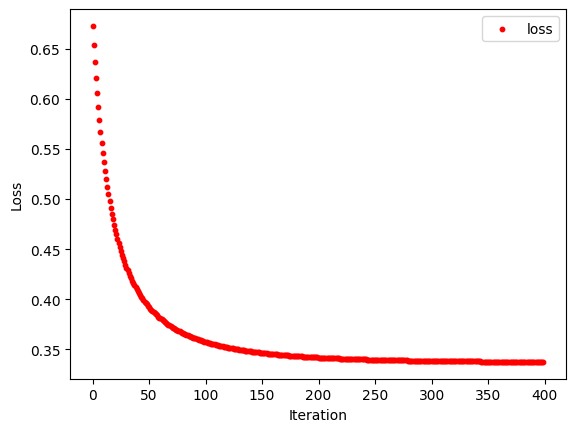

In [ ]:
cls.loss_hist

f1 score train:  0.8685714285714287
f1 score test:  0.7317073170731707


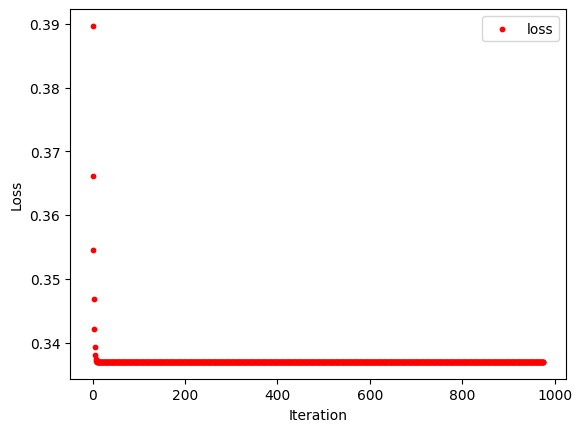

In [ ]:
#@title # 5c Visualize loss với learning rate và iter khác nhau {"run": "auto", "display-mode": "form"}

lr = 0.0895 #@param {type:"slider", min:0, max:1, step:0.0005}
iter = 977 #@param {type:"slider", min:0, max:1000, step:1}


cls = LogisticRegression(X_train, y_train, iter=iter, lr = lr)
model= cls.fit()
y_test_pred = cls.predict(X_test)
y_train_pred = cls.predict(X_train)

#Let's see the f1-score for training and testing data
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
print("f1 score train: ",f1_score_train)
print("f1 score test: ", f1_score_test)
cls.loss_hist